In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
Data = pd.read_csv(r'C:\Users\abhes\OneDrive\Documents\IMDB Dataset.csv')

In [3]:
Data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
sentiment = pd.get_dummies(Data['sentiment'])
sentiment

,negative,positive
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
49995,0,1
49996,1,0
49997,1,0
49998,1,0


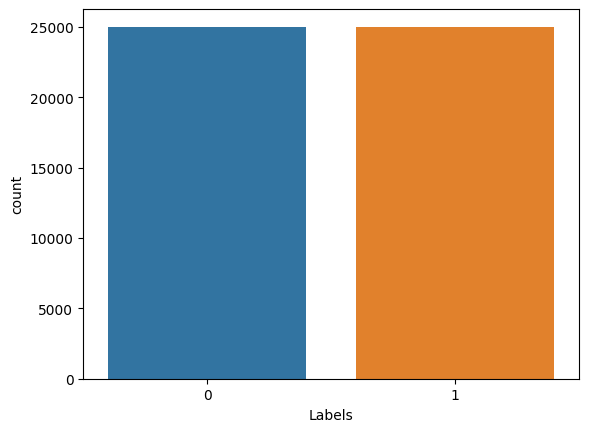

In [5]:
sns.countplot(sentiment,x=sentiment['negative'])
plt.xlabel('Labels')
plt.show()

In [6]:
Data.shape

(50000, 2)

In [7]:
X = Data['review']
X= X.iloc[:5000]
X

0       One of the other reviewers has mentioned that ...
1       A wonderful little production. <br /><br />The...
2       I thought this was a wonderful way to spend ti...
3       Basically there's a family where a little boy ...
4       Petter Mattei's "Love in the Time of Money" is...
                              ...                        
4995    An interesting slasher film with multiple susp...
4996    i watched this series when it first came out i...
4997    Once again Jet Li brings his charismatic prese...
4998    I rented this movie, after hearing Chris Gore ...
4999    This was a big disappointment for me. I think ...
Name: review, Length: 5000, dtype: object

In [8]:
y = pd.get_dummies(Data['sentiment'],drop_first=True)
y = y.iloc[:5000,0]
y

0       1
1       1
2       1
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    0
4999    0
Name: positive, Length: 5000, dtype: uint8

In [9]:
import re
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize

In [10]:
#STEMMING
stemer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

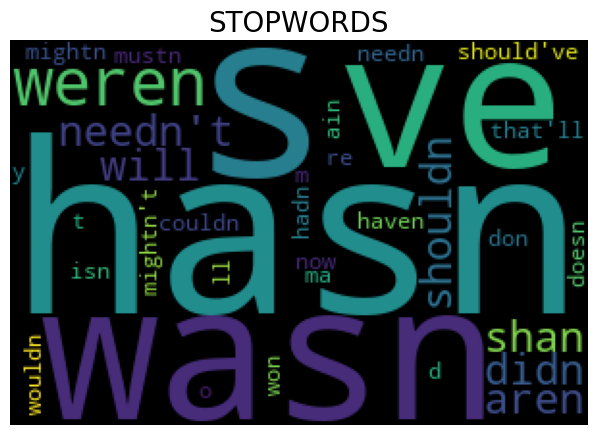

In [11]:
from wordcloud import WordCloud
plt.figure(figsize=(10,5))
wordcloud=WordCloud(width=300,height=200, contour_color='black').generate(' '.join(stopwords))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('STOPWORDS',fontsize=20,loc='center')
plt.show()

In [12]:
corpus =[]
for i in range(0,len(X)):
    review = re.sub('[^a-zA-Z ]',' ',X[i])
    review = review.lower()
    review = review.split()
    
    review = [stemer.stem(word) for word in review if not word in stopwords]
    review = ' '.join(review)
    corpus.append(review)

In [13]:
corpus[0]  #stemmed

'one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch da

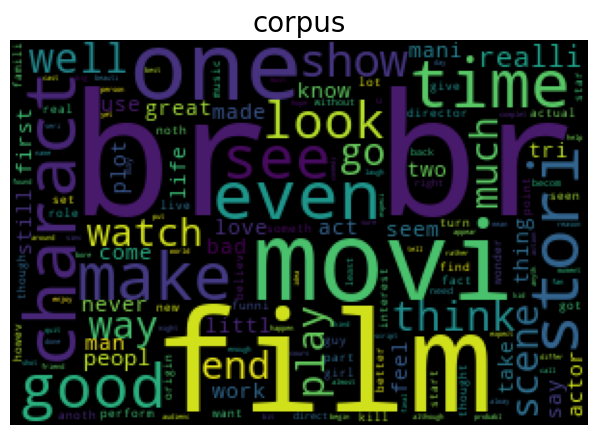

In [14]:
from wordcloud import WordCloud
plt.figure(figsize=(10,5))
wordcloud=WordCloud(width=300,height=200, contour_color='black').generate(' '.join(corpus))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('corpus',fontsize=20,loc='center')
plt.show()

# BOG OF WORDS

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True,ngram_range=(3,3),max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [16]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
#cv.vocabulary_  --> TO represent the skip gram format

'happened br br': 1356,
 'br br first': 380,
 'br first thing': 791,
 'word br br': 2415,
 'away br br': 92,
 'br br would': 759,

In [18]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
len(y)

5000

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [21]:
from sklearn.naive_bayes import MultinomialNB
mlnb = MultinomialNB().fit(X_train,y_train)

In [22]:
print(X_train.shape)
print(y_train.shape)

(4000, 2500)
(4000,)


In [23]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
pred = mlnb.predict(X_test)

In [25]:
conf0 = confusion_matrix(y_test,pred)
conf0

array([[386, 139],
       [193, 282]], dtype=int64)

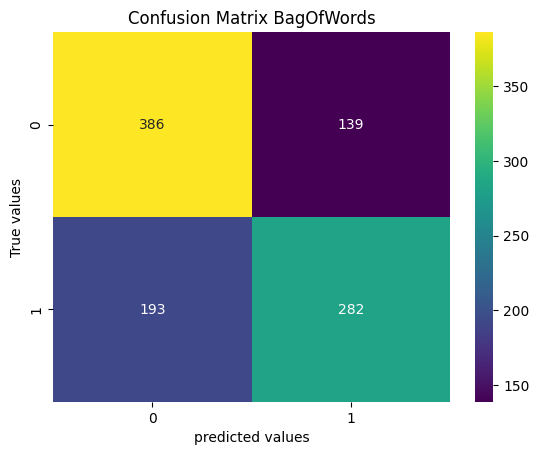

In [26]:
sns.heatmap(conf0,annot = True,fmt='d',cmap='viridis')
plt.title("Confusion Matrix BagOfWords")
plt.xlabel('predicted values')
plt.ylabel('True values')
plt.show()

In [27]:
Accuracy_BOG =accuracy_score(y_test,pred)*100
Accuracy_BOG

66.8

# TFIDFVECTORIZER

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(binary=True,ngram_range=(3,3),max_features=2500)
X = tf.fit_transform(corpus).toarray()

In [29]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
#tf.vocabulary_  --> TO represent the skip gram format

 'happened br br': 1356,
 'br br first': 380,
 'br first thing': 791,
 'word br br': 2415,
 'away br br': 92,
 'br br would': 759,

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [32]:
mlnb1 = MultinomialNB()
mlnb1.fit(X_train,y_train)
predict = mlnb1.predict(X_test)

In [33]:
len(predict)

1000

In [34]:
conf1 = confusion_matrix(y_test,predict)
conf1

array([[396, 129],
       [198, 277]], dtype=int64)

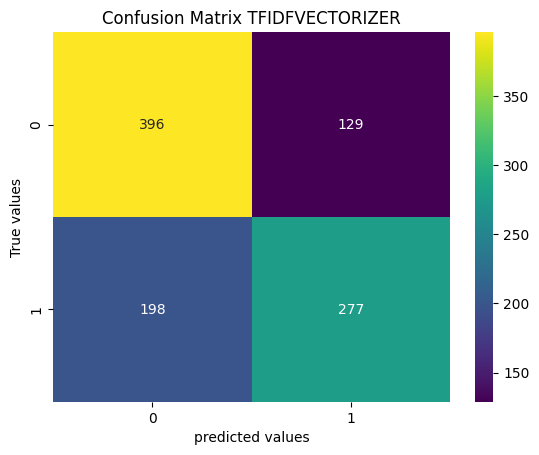

In [35]:
sns.heatmap(conf1,annot = True,fmt='d',cmap='viridis')
plt.title("Confusion Matrix TFIDFVECTORIZER")
plt.xlabel('predicted values')
plt.ylabel('True values')
plt.show()

In [36]:
Accuracy_TFIDF =accuracy_score(y_test,predict)*100
Accuracy_TFIDF

67.30000000000001

# WORD2VECTOR

In [37]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

In [38]:
corpus =[]
for i in range(0,len(X)):
    review = re.sub('[^a-zA-Z ]',' ',Data['review'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords]
    review = ' '.join(review)
    corpus.append(review)

In [39]:
corpus[0] #lemmatized

'one reviewer mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experi

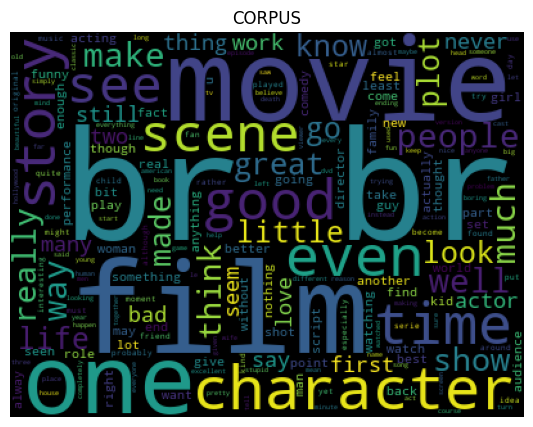

In [40]:
from wordcloud import WordCloud
plt.figure(figsize=(14,5))
wordcloud = WordCloud(width=400,height=300).generate(''.join(corpus))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('CORPUS')
plt.show()

In [41]:
len(corpus)

5000

In [42]:
words = []
for sent in corpus:
    sent_token = sent_tokenize(sent)
    for sent in sent_token:
        review
        words.append(simple_preprocess(sent))

In [43]:
W2V = Word2Vec(words,window=5,min_count=2)

In [44]:
W2V.wv.index_to_key[1:10]

['movie', 'film', 'one', 'like', 'time', 'good', 'character', 'get', 'story']

In [45]:
W2V.corpus_count

5000

In [46]:
W2V.epochs

5

In [47]:
#import gensim.downloader as api
#wv = api.load('word2vec-google-news-300')

In [48]:
#wv

In [49]:
def avg_word2vec(doc):
    return np.mean([W2V.wv[word] for word in doc if word in W2V.wv.index_to_key],axis = 0)

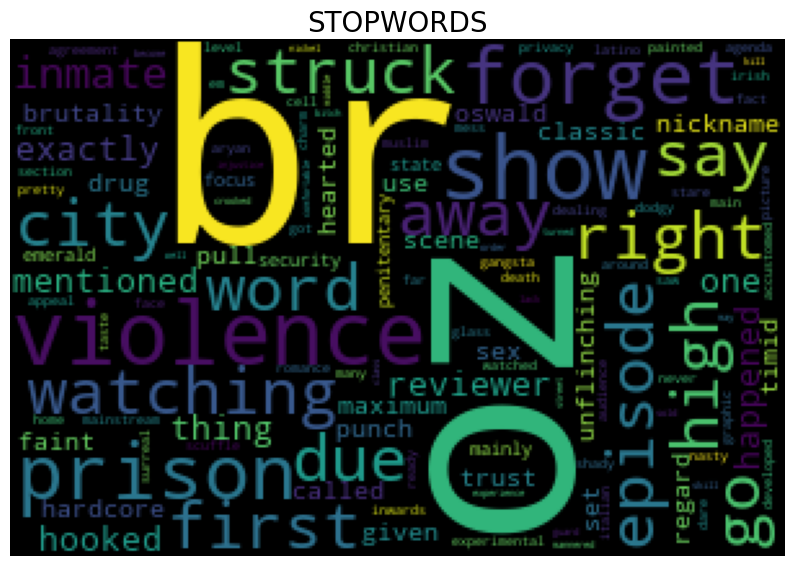

In [50]:
from wordcloud import WordCloud
plt.figure(figsize=(10,15))
wordcloud=WordCloud(width=300,height=200, contour_color='black').generate(' '.join(words[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('STOPWORDS',fontsize=20,loc='center')
plt.show()

In [51]:
from tqdm import tqdm

In [52]:
X = []
for i in tqdm(range(len(words))):
    X.append(avg_word2vec(words[i]))

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:20<00:00, 246.88it/s]


In [53]:
X[1]

array([-0.05402361,  0.25978118,  0.21731366,  0.3348829 , -0.08639789,
       -0.816284  ,  0.25590116,  0.92738634, -0.32909602, -0.37935787,
       -0.24048257, -0.6809652 , -0.20590644,  0.5150441 ,  0.07685913,
       -0.30518526,  0.0071928 , -0.43845874, -0.07641809, -0.8705458 ,
        0.4691065 ,  0.16345595,  0.4396718 , -0.2944975 ,  0.13955663,
       -0.10491303, -0.33760023, -0.10295755, -0.56990653, -0.02539654,
        0.45860437, -0.07336179,  0.16936731, -0.33259732, -0.30126065,
        0.28011215,  0.35022923, -0.3607427 , -0.28718308, -0.64886314,
       -0.04998433, -0.30547923, -0.36782044, -0.06118561,  0.31352547,
        0.02329954, -0.385801  , -0.00663549,  0.23712844,  0.4255863 ,
        0.03824772, -0.33285663, -0.39502987, -0.0800067 , -0.05944029,
        0.2543697 ,  0.22351998, -0.20845701, -0.22652937,  0.20266744,
        0.17553425, -0.01097159, -0.24285841,  0.04401937, -0.59592706,
        0.44916952,  0.1007465 ,  0.28459308, -0.28594866,  0.60

In [54]:
words[1]

['wonderful',
 'little',
 'production',
 'br',
 'br',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'give',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'br',
 'br',
 'actor',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voice',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'reference',
 'williams',
 'diary',
 'entry',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'br',
 'br',
 'realism',
 'really',
 'come',
 'home',
 'little',
 'thing',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'technique',
 'remains',
 'solid',
 'disappears',
 'play',
 'knowledge',
 'sens',
 'particularly',
 'scene',
 'concerning',
 'orton',
 'halliwell',
 'set',
 'particularly',
 'flat',
 'halliwell',
 'mural',
 'decorating',
 'every',
 'surface',
 't

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,criterion='entropy')

In [57]:
len(X_train)

4000

In [58]:
model = rf.fit(X_train,y_train)
predt = model.predict(X_test)

In [59]:
conf = confusion_matrix(y_test,predt)
conf

array([[395, 133],
       [151, 321]], dtype=int64)

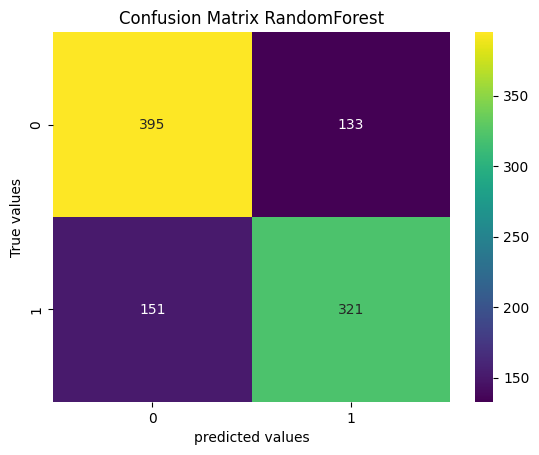

In [60]:
sns.heatmap(conf,annot = True,fmt='d',cmap='viridis')
plt.title("Confusion Matrix RandomForest")
plt.xlabel('predicted values')
plt.ylabel('True values')
plt.show()

In [63]:
Accuracy_Word2Vec = accuracy_score(y_test,predt)*100
Accuracy_Word2Vec

71.6

In [65]:
Z = np.arange(3)
Accuracies =[Accuracy_BOG,Accuracy_TFIDF,Accuracy_Word2Vec]

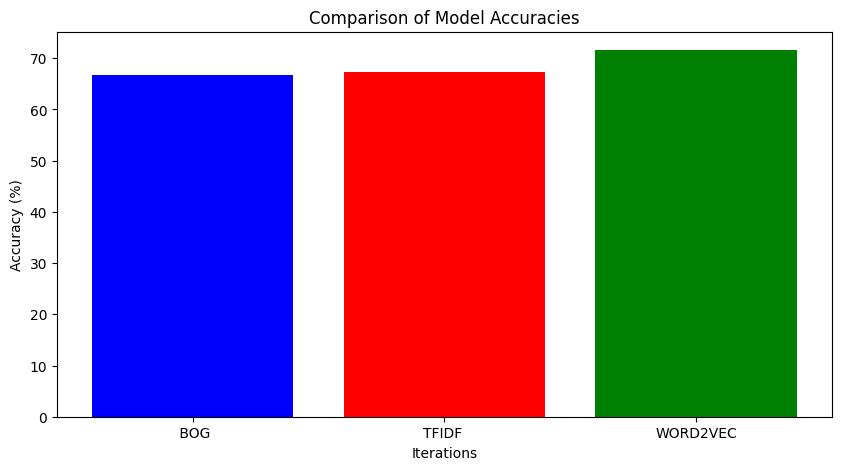

In [78]:
color = ['blue','red','green']
plt.figure(figsize=(10,5))
plt.bar(Z,Accuracies,color=color)
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.xticks(Z, [' BOG', 'TFIDF ', 'WORD2VEC'])
plt.show()